In [1]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
import keras

In [2]:
%matplotlib inline

In [3]:
DIRECTORY='/content/drive/MyDrive/washinghandsproject'

In [4]:
CATEGORIES = ['notwashedhands', 'washedhands']

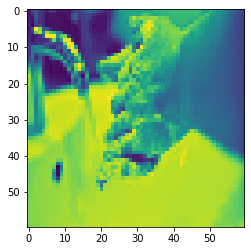

In [5]:
data = []

for category in CATEGORIES:
    path = os.path.join(DIRECTORY, category)
    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        label = CATEGORIES.index(category)
        arr = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        new_arr = cv2.resize(arr, (60, 60))
        data.append([new_arr, label])
        plt.imshow(new_arr)

In [6]:
data

[[array([[ 54, 202,  56, ...,  65,  75,  43],
         [ 51,  55,  55, ...,  69,  87,  53],
         [106,  54,  82, ...,  69,  98,  97],
         ...,
         [220, 209, 117, ..., 221, 223, 224],
         [220, 206, 114, ..., 218, 219, 218],
         [120, 193, 104, ..., 136, 143, 146]], dtype=uint8), 0],
 [array([[ 54, 202,  56, ...,  65,  75,  43],
         [ 51,  55,  55, ...,  69,  87,  53],
         [106,  54,  82, ...,  69,  98,  97],
         ...,
         [220, 209, 117, ..., 221, 223, 224],
         [220, 206, 114, ..., 218, 219, 218],
         [120, 193, 104, ..., 136, 143, 146]], dtype=uint8), 0],
 [array([[ 54, 202,  56, ...,  65,  75,  43],
         [ 51,  55,  55, ...,  69,  87,  53],
         [106,  54,  82, ...,  69,  98,  97],
         ...,
         [220, 209, 117, ..., 221, 223, 224],
         [220, 206, 114, ..., 218, 219, 218],
         [120, 193, 104, ..., 136, 143, 146]], dtype=uint8), 0],
 [array([[ 54, 202,  56, ...,  65,  75,  43],
         [ 51,  55,  55, ..

In [7]:
data[0][1]

0

In [8]:
import random

random.shuffle(data)

In [9]:
X = []
y = []

In [10]:
for features, label in data:
    X.append(features)
    y.append(label)

In [11]:
X = np.array(X)
y = np.array(y)

In [12]:
X

array([[[ 60,  46,  67, ...,  51,  29, 116],
        [ 62,  24,  67, ..., 142, 151, 109],
        [ 31, 122, 155, ...,  29,  51,  52],
        ...,
        [ 27,  24,  38, ..., 123, 123, 126],
        [ 16,  28,  29, ..., 107, 117, 110],
        [ 31,  52,  57, ...,  86, 102,  99]],

       [[ 49,  30,  75, ...,  41, 100, 151],
        [ 73,  72,  72, ..., 155, 152,  52],
        [ 57,  33,  71, ...,  32,  44, 134],
        ...,
        [ 27,  19,  18, ...,  99,  81, 121],
        [ 28,  19,  13, ..., 128,  81, 103],
        [ 28,  17,   6, ..., 140,  92, 100]],

       [[213, 215, 215, ..., 207, 205, 204],
        [217, 218, 219, ..., 209, 208, 207],
        [221, 221, 221, ..., 211, 210, 210],
        ...,
        [ 36,  41,  43, ..., 232, 232, 232],
        [ 47, 166, 226, ..., 232, 232, 232],
        [165, 188, 237, ..., 232, 232, 232]],

       ...,

       [[162, 141,  64, ..., 157, 172, 167],
        [111, 168, 168, ..., 202, 108, 170],
        [206, 212, 116, ..., 174, 134, 174

In [13]:
y

array([1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,

In [14]:
import pickle

In [15]:
pickle.dump(X, open('X.pkl', 'wb'))
pickle.dump(y, open('y.pkl', 'wb'))

In [16]:
X

array([[[ 60,  46,  67, ...,  51,  29, 116],
        [ 62,  24,  67, ..., 142, 151, 109],
        [ 31, 122, 155, ...,  29,  51,  52],
        ...,
        [ 27,  24,  38, ..., 123, 123, 126],
        [ 16,  28,  29, ..., 107, 117, 110],
        [ 31,  52,  57, ...,  86, 102,  99]],

       [[ 49,  30,  75, ...,  41, 100, 151],
        [ 73,  72,  72, ..., 155, 152,  52],
        [ 57,  33,  71, ...,  32,  44, 134],
        ...,
        [ 27,  19,  18, ...,  99,  81, 121],
        [ 28,  19,  13, ..., 128,  81, 103],
        [ 28,  17,   6, ..., 140,  92, 100]],

       [[213, 215, 215, ..., 207, 205, 204],
        [217, 218, 219, ..., 209, 208, 207],
        [221, 221, 221, ..., 211, 210, 210],
        ...,
        [ 36,  41,  43, ..., 232, 232, 232],
        [ 47, 166, 226, ..., 232, 232, 232],
        [165, 188, 237, ..., 232, 232, 232]],

       ...,

       [[162, 141,  64, ..., 157, 172, 167],
        [111, 168, 168, ..., 202, 108, 170],
        [206, 212, 116, ..., 174, 134, 174

In [17]:
y

array([1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


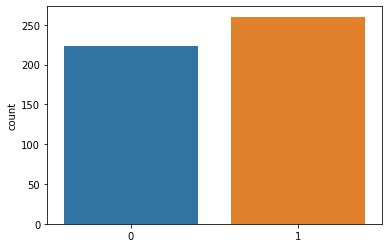

In [18]:
import seaborn as sns
sns.countplot(y)

In [19]:
X = X/255

In [20]:
X

array([[[0.23529412, 0.18039216, 0.2627451 , ..., 0.2       ,
         0.11372549, 0.45490196],
        [0.24313725, 0.09411765, 0.2627451 , ..., 0.55686275,
         0.59215686, 0.42745098],
        [0.12156863, 0.47843137, 0.60784314, ..., 0.11372549,
         0.2       , 0.20392157],
        ...,
        [0.10588235, 0.09411765, 0.14901961, ..., 0.48235294,
         0.48235294, 0.49411765],
        [0.0627451 , 0.10980392, 0.11372549, ..., 0.41960784,
         0.45882353, 0.43137255],
        [0.12156863, 0.20392157, 0.22352941, ..., 0.3372549 ,
         0.4       , 0.38823529]],

       [[0.19215686, 0.11764706, 0.29411765, ..., 0.16078431,
         0.39215686, 0.59215686],
        [0.28627451, 0.28235294, 0.28235294, ..., 0.60784314,
         0.59607843, 0.20392157],
        [0.22352941, 0.12941176, 0.27843137, ..., 0.1254902 ,
         0.17254902, 0.5254902 ],
        ...,
        [0.10588235, 0.0745098 , 0.07058824, ..., 0.38823529,
         0.31764706, 0.4745098 ],
        [0.1

In [21]:
X = X.reshape(-1, 60, 60, 1)

In [22]:
X

array([[[[0.23529412],
         [0.18039216],
         [0.2627451 ],
         ...,
         [0.2       ],
         [0.11372549],
         [0.45490196]],

        [[0.24313725],
         [0.09411765],
         [0.2627451 ],
         ...,
         [0.55686275],
         [0.59215686],
         [0.42745098]],

        [[0.12156863],
         [0.47843137],
         [0.60784314],
         ...,
         [0.11372549],
         [0.2       ],
         [0.20392157]],

        ...,

        [[0.10588235],
         [0.09411765],
         [0.14901961],
         ...,
         [0.48235294],
         [0.48235294],
         [0.49411765]],

        [[0.0627451 ],
         [0.10980392],
         [0.11372549],
         ...,
         [0.41960784],
         [0.45882353],
         [0.43137255]],

        [[0.12156863],
         [0.20392157],
         [0.22352941],
         ...,
         [0.3372549 ],
         [0.4       ],
         [0.38823529]]],


       [[[0.19215686],
         [0.11764706],
         [0.29

In [23]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [24]:
model = Sequential()

model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())

model.add(Dense(128, input_shape = X.shape[1:], activation = 'relu'))

model.add(Dense(2, activation = 'softmax'))

In [25]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [26]:
history=model.fit(X, y, epochs=5, validation_split=0.1)

Epoch 1/5
14/14 [==============================] - 4s 241ms/step - loss: 0.6610 - accuracy: 0.6112 - val_loss: 0.5665 - val_accuracy: 0.7143
Epoch 2/5
14/14 [==============================] - 3s 204ms/step - loss: 0.5383 - accuracy: 0.7248 - val_loss: 0.5128 - val_accuracy: 0.7143
Epoch 3/5
14/14 [==============================] - 3s 204ms/step - loss: 0.3950 - accuracy: 0.7948 - val_loss: 0.4110 - val_accuracy: 0.7755
Epoch 4/5
14/14 [==============================] - 3s 205ms/step - loss: 0.2936 - accuracy: 0.8755 - val_loss: 0.2989 - val_accuracy: 0.8571
Epoch 5/5
14/14 [==============================] - 3s 205ms/step - loss: 0.1993 - accuracy: 0.9153 - val_loss: 0.2659 - val_accuracy: 0.8980


In [27]:
model.save("washhands.model", save_format="h5")

In [28]:
X.shape

(483, 60, 60, 1)

In [29]:
import time
time.time()

1618236445.928435

In [30]:
type(1617052884.6952958)

float

In [31]:
CATEGORIES = ['notwashedhands', 'washedhands']


def image(path):
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    new_arr = cv2.resize(img, (60, 60))
    new_arr = np.array(new_arr)
    new_arr = new_arr.reshape(-1, 60, 60, 1)
    return new_arr


In [37]:
#use the model to predict a non-washing hands and it predicts correctly after using lots of images to train model
prediction = model.predict([image('jhands.jpg')])
print(CATEGORIES[prediction.argmax()])

notwashedhands


In [38]:
#use the model to predict a washing hands and it predicts correctly after using lots of images to train model
prediction = model.predict([image('jh4.jpg')])
print(CATEGORIES[prediction.argmax()])


washedhands


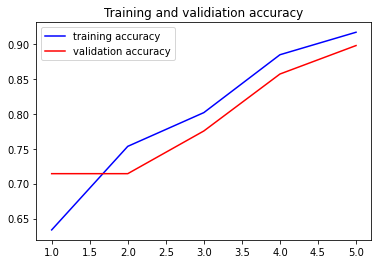

In [34]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b',label='training accuracy')
plt.plot(epochs, val_acc, 'r',label='validation accuracy')
plt.title('Training and validiation accuracy')
plt.legend()
plt.show()